In [1]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import matplotlib.pyplot as plt
import struct

from math import sin, cos

In [2]:
sec = 10000000 / 400
min = sec / 60
h = min / 60

print(h)

6.944444444444445


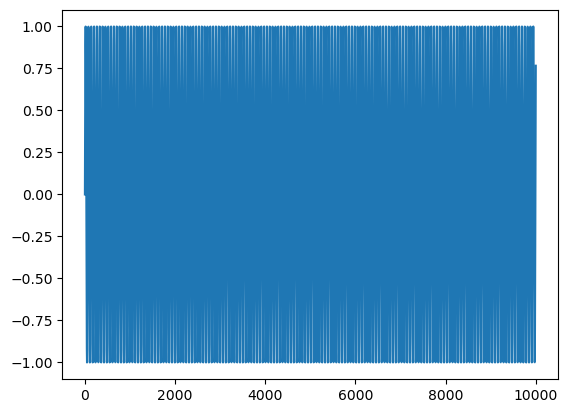

In [25]:
# Generate data
time = []
sin_x = []
cos_x = []

for i in range(0,10000):
    time.append(i)
    sin_x.append(sin(i / 10))
    cos_x.append(cos(i / 10))


meta1 = {
    "name": "Test",
    "unit": "TestUnit",
    "datasetId": "63a5cf1c4884de8087e7cfff",
    "start": 2,
    "end": 10,
    "data": {
        "time": time,
        "values": sin_x
    }
}

plt.plot(time, sin_x)



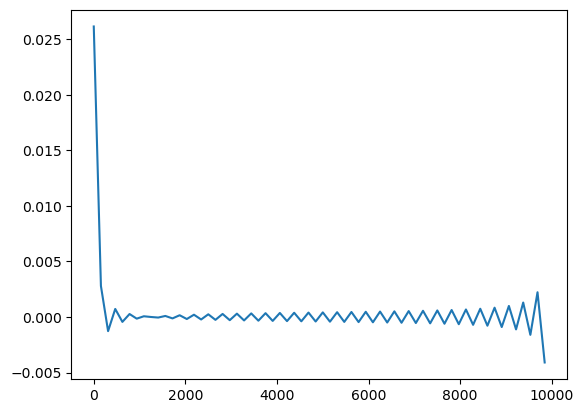

In [26]:
from scipy.signal import resample

[sin_new, t_new] = resample(sin_x, 64, t=time)

plt.plot(t_new, sin_new)

(10000, 2)
[[ 0.00000000e+00  5.50000000e+02  5.81000000e+02  1.11500000e+03
   1.71200000e+03  2.24600000e+03  2.78100000e+03  3.37700000e+03
   3.91100000e+03  4.50800000e+03  5.04200000e+03  5.57600000e+03
   6.17300000e+03  6.70700000e+03  7.24100000e+03  7.83800000e+03
   8.37200000e+03  8.90600000e+03  9.97500000e+03  9.99900000e+03]
 [ 0.00000000e+00 -9.99755173e-01  9.99810581e-01 -9.99647856e-01
   9.99858890e-01 -9.99715012e-01  9.97616985e-01 -9.99775071e-01
   9.99599996e-01 -9.99828032e-01  9.99671803e-01 -9.99465533e-01
   9.99736513e-01 -9.99549087e-01  9.99311627e-01 -9.99625545e-01
   9.99406927e-01 -9.99138281e-01 -9.99017476e-01  7.66604362e-01]]
(2, 20)


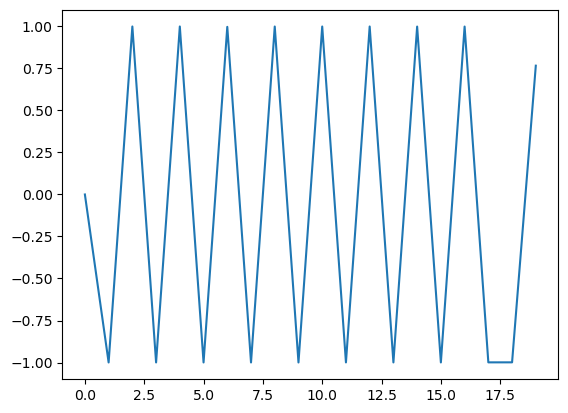

In [40]:
import lttb
import numpy as np


data = np.asarray([time, sin_x]).T
print(data.shape)
data = lttb.downsample(data, n_out=20)
print(data)
print(data.shape)
plt.plot(data[1])

In [19]:
import numpy as np

with open("data_sin_10k.csv", "w") as f:
    f.write("time, sensor_sin\n")
    for (t, s, c) in zip(time, sin_x, cos_x):
        f.write(",".join([str(t), str(round(s, 2))]))
        f.write("\n")

In [5]:
# Write to bytearray
from src.controller import Controller

ctrl = Controller()

ctrl.addTimeSeries(meta1)

ImportError: cannot import name 'Controller' from 'src.controller' (/Users/king/Github/TSStore/src/controller/__init__.py)

In [ ]:
ts = ctrl.getTimeSeriesFull(datasetId="63a5cf1c4884de8087e7cfff")

In [ ]:
# Load series

from src.main import TSStore

store2 = TSStore(_id="123456")
store2.loadSeries()

ModuleNotFoundError: No module named 'src.main'

In [ ]:
timeCut, dataCut = store2.getPart(2, 5)

print(len(timeCut))

4
